In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
import seaborn as sns

Read data

In [ ]:
df = pd.read_excel("Data_SM.xlsx")
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep':'QualityofSleep'}, inplace=True)

df = df[['StressLevel', 'QualityofSleep', 'Gender']]
df

,StressLevel,QualityofSleep,Gender
0,6,6,Male
1,8,6,Male
2,8,6,Male
3,8,4,Male
4,8,4,Male
...,...,...,...
145,5,7,Female
146,5,8,Male
147,7,5,Male
148,6,7,Female


In [ ]:
null_counts = df.isnull().sum()

# Display the counts of null values
print("Null value counts:")
print(null_counts)

# Optionally, you can sum up all null values across the entire DataFrame
total_null_values = df.isnull().sum().sum()
print(f"\nTotal null values in DataFrame: {total_null_values}")

Null value counts:
StressLevel       0
QualityofSleep    0
Gender            0
dtype: int64

Total null values in DataFrame: 0


# **1. Summarizing Data**

## **1.1. One Categorical**
Frequency table

Mode

Graphs


**Gender**

In [ ]:
# Frequency
frequency_table = df['Gender'].value_counts().sort_index()

# Relative Frequency
relative_frequency = frequency_table / frequency_table.sum()

#Cumulative Frequency
cumulative_frequency = frequency_table.cumsum()

# Cumulative Relative Frequency
cumulative_relative_frequency = relative_frequency.cumsum()

# Create DataFrame with 4 column
frequency_df = pd.DataFrame({
    'Gender': frequency_table.index,
    'Frequency': frequency_table.values,
    'Relative Frequency': relative_frequency.values,
    'Cumulative Frequency': cumulative_frequency.values,
    'Cumulative Relative Frequency': cumulative_relative_frequency.values
})

frequency_df


,Gender,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
0,Female,46,0.306667,46,0.306667
1,Male,104,0.693333,150,1.000000


Frequency Bar graph


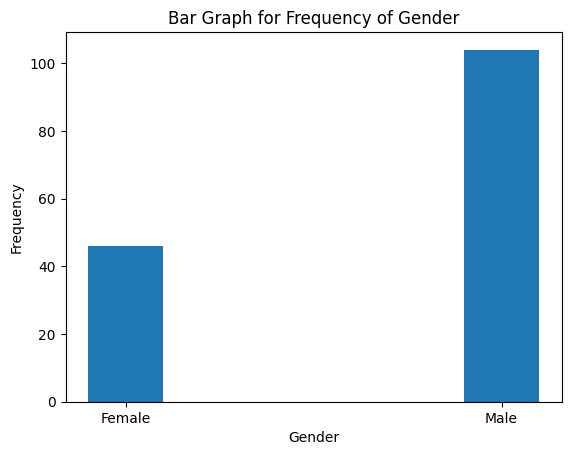

In [ ]:
# creating the Frequency Bar graph
df = frequency_df
print("Frequency Bar graph")
# plt.figure(figsize=(10, 5))
plt.bar(df.Gender, df.Frequency, width = 0.2)

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Bar Graph for Frequency of Gender")
plt.show()


Relative Frequency Bar graph


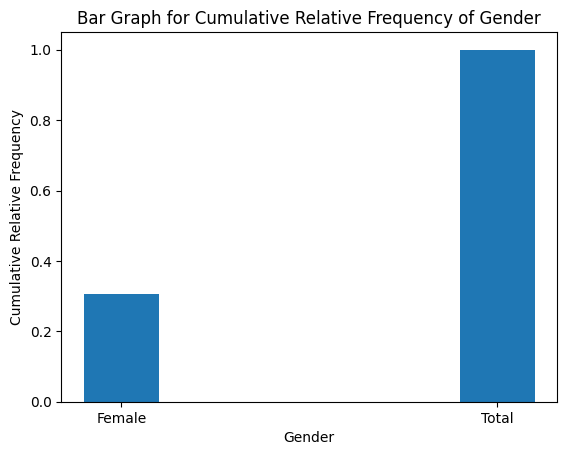

In [ ]:
# Cumulative Relative Frequency
df = frequency_df
print("Relative Frequency Bar graph")
# plt.figure(figsize=(10, 5))
frequency_df.loc[1, 'Gender'] = 'Total'
plt.bar(df['Gender'], df['Cumulative Relative Frequency'], width = 0.2)

plt.xlabel("Gender")
plt.ylabel("Cumulative Relative Frequency")
plt.title("Bar Graph for Cumulative Relative Frequency of Gender")
plt.show()

In [ ]:
df = frequency_df
df.describe()

,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
count,2.000000,2.000000,2.000000,2.000000
mean,75.000000,0.500000,98.000000,0.653333
std,41.012193,0.273415,73.539105,0.490261
min,46.000000,0.306667,46.000000,0.306667
25%,60.500000,0.403333,72.000000,0.480000
50%,75.000000,0.500000,98.000000,0.653333
75%,89.500000,0.596667,124.000000,0.826667
max,104.000000,0.693333,150.000000,1.000000


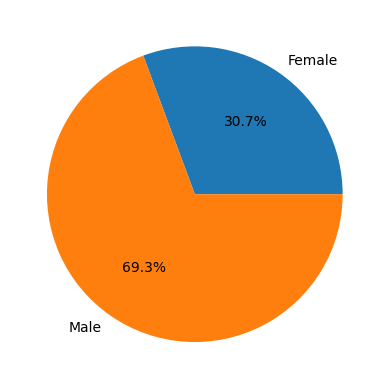

In [ ]:
#Pie Chart
fig, ax = plt.subplots()
ax.pie(df["Frequency"],
       labels = df["Gender"],
       autopct='%1.1f%%')
ax.set_title('Proportion of Gender')
plt.show()

## **1.2. Two quantitative**
Frequency

Graphs

All possible measures

Check for outliers

**StressLevel**

In [ ]:
# Read data
df = pd.read_excel("Data_SM.xlsx")
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep':'QualityofSleep'}, inplace=True)
df

## Stress Level
frequency_table1 = df['StressLevel'].value_counts().sort_index()

# Relative Frequency
relative_frequency1 = frequency_table1 / frequency_table1.sum()

#Cumulative Frequency
cumulative_frequency1 = frequency_table1.cumsum()

# Cumulative Relative Frequency
cumulative_relative_frequency1 = relative_frequency1.cumsum()
# Create DataFrame with 4 column
frequency_df1 = pd.DataFrame({
    'Stress_Level': frequency_table1.index,
    'Frequency': frequency_table1.values,
    'Relative Frequency': relative_frequency1.values,
    'Cumulative Frequency': cumulative_frequency1.values,
    'Cumulative Relative Frequency': cumulative_relative_frequency1.values
})


# Quality of Sleep
# Frequency
frequency_table2 = df['QualityofSleep'].value_counts().sort_index()

# Relative Frequency
relative_frequency2 = frequency_table2 / frequency_table2.sum()

#Cumulative Frequency
cumulative_frequency2 = frequency_table2.cumsum()

# Cumulative Relative Frequency
cumulative_relative_frequency2 = relative_frequency2.cumsum()

# Create DataFrame with 4 column
frequency_df2 = pd.DataFrame({
    'Quality_of_Sleep': frequency_table2.index,
    'Frequency': frequency_table2.values,
    'Relative Frequency': relative_frequency2.values,
    'Cumulative Frequency': cumulative_frequency2.values,
    'Cumulative Relative Frequency': cumulative_relative_frequency2.values
})


In [ ]:
df1 = frequency_df1
df1

,Stress_Level,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
0,3,3,0.020000,3,0.020000
1,4,42,0.280000,45,0.300000
2,5,21,0.140000,66,0.440000
3,6,38,0.253333,104,0.693333
4,7,8,0.053333,112,0.746667
5,8,38,0.253333,150,1.000000


Frequency Bar graph


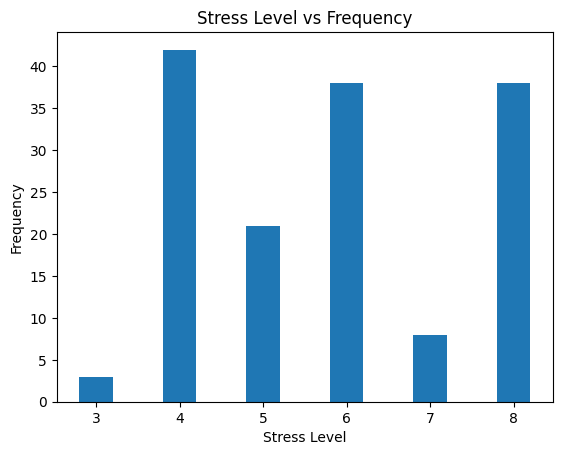

In [ ]:
print("Frequency Bar graph")
plt.bar(df1.Stress_Level, df1.Frequency, width = 0.4)

plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.title("Stress Level vs Frequency")
plt.show()

In [ ]:
df1.describe()

,Stress_Level,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.500000,25.000000,0.166667,80.000000,0.533333
std,1.870829,16.828547,0.112190,52.630789,0.350872
min,3.000000,3.000000,0.020000,3.000000,0.020000
25%,4.250000,11.250000,0.075000,50.250000,0.335000
50%,5.500000,29.500000,0.196667,85.000000,0.566667
75%,6.750000,38.000000,0.253333,110.000000,0.733333
max,8.000000,42.000000,0.280000,150.000000,1.000000


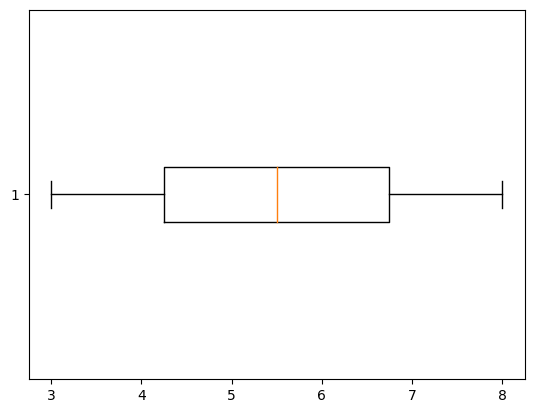

In [ ]:
plt.boxplot(df1.Stress_Level, vert = False)
plt.show()

**QualityofSleep**

In [ ]:
df2 = frequency_df2
df2

,Quality_of_Sleep,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
0,4,5,0.033333,5,0.033333
1,5,7,0.046667,12,0.080000
2,6,38,0.253333,50,0.333333
3,7,37,0.246667,87,0.580000
4,8,62,0.413333,149,0.993333
5,9,1,0.006667,150,1.000000


Frequency Bar graph


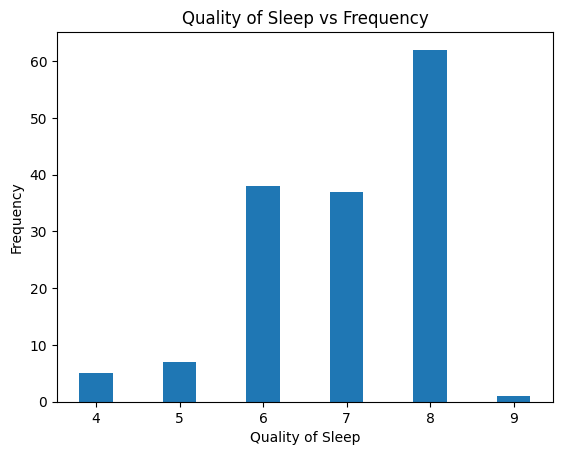

In [ ]:
print("Frequency Bar graph")
plt.bar(df2.Quality_of_Sleep, df2.Frequency, width = 0.4)

plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Quality of Sleep vs Frequency")
plt.show()

In [ ]:
df2.describe()

,Quality_of_Sleep,Frequency,Relative Frequency,Cumulative Frequency,Cumulative Relative Frequency
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,6.500000,25.000000,0.166667,75.500000,0.503333
std,1.870829,24.421302,0.162809,64.401087,0.429341
min,4.000000,1.000000,0.006667,5.000000,0.033333
25%,5.250000,5.500000,0.036667,21.500000,0.143333
50%,6.500000,22.000000,0.146667,68.500000,0.456667
75%,7.750000,37.750000,0.251667,133.500000,0.890000
max,9.000000,62.000000,0.413333,150.000000,1.000000


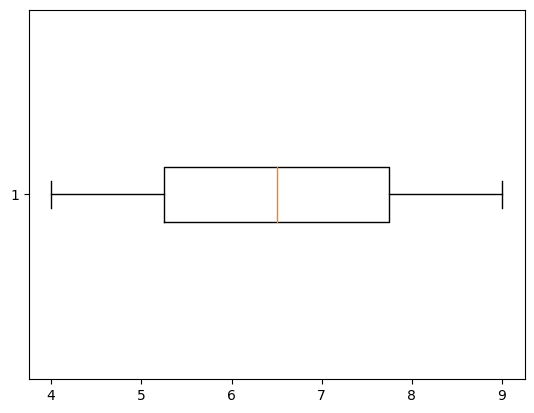

In [ ]:
plt.boxplot(df2.Quality_of_Sleep, vert = False)
plt.show()

# **2. Relation between two variable**

Scatter plot

r (linear correlation coefficient)

Least square regression

Residual -> check OutLine


**Scatter plot**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices

# Read data
df = pd.read_excel("Data_SM.xlsx")
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep':'QualityofSleep'}, inplace=True)

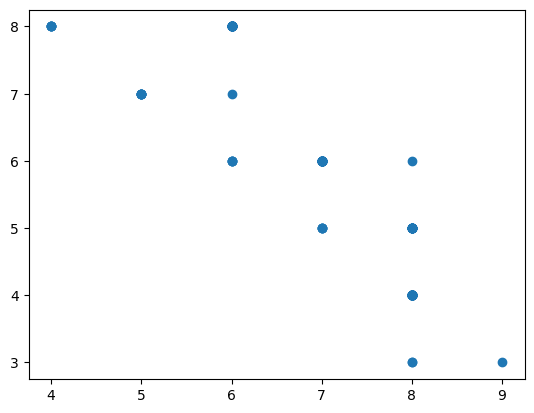

In [ ]:
plt.scatter(df['QualityofSleep'], df['StressLevel'])

**r (linear correlation coefficient)**

**Least square regression**

Correlation x and y 
 [[ 1.         -0.87780061]
 [-0.87780061  1.        ]]


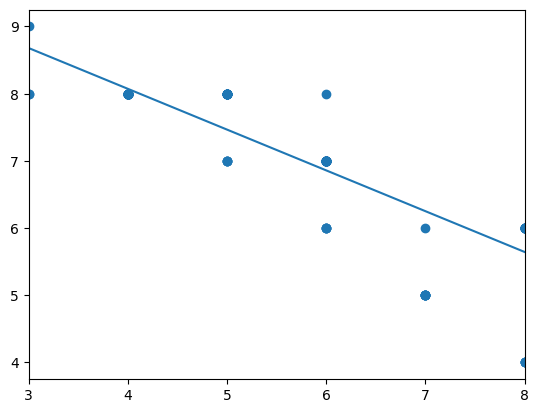

                            OLS Regression Results                            
Dep. Variable:         QualityofSleep   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     497.0
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           3.67e-49
Time:                        17:14:45   Log-Likelihood:                -114.83
No. Observations:                 150   AIC:                             233.7
Df Residuals:                     148   BIC:                             239.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.5008      0.164     64.178      

In [ ]:
# Correlation x and y
print('Correlation x and y \n', np.corrcoef(df['StressLevel'], df['QualityofSleep']))

#  OLS OLS Regression Results
X = sm.add_constant(df['StressLevel'])
y = df['QualityofSleep']
model = sm.OLS(y, X).fit()

fig = sm.graphics.abline_plot(model_results = model)
ax = fig.axes[0]
ax.scatter(X.iloc[:,1], y)
#ax.margins(0.1)
plt.show()

y, X = dmatrices('QualityofSleep ~ StressLevel', data=df, return_type='dataframe')

model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())


In [ ]:
# y = 10.5008 - 0.6070x

In [ ]:
df.describe()

,QualityofSleep,StressLevel
count,150.000000,150.000000
mean,6.980000,5.800000
std,1.089732,1.575824
min,4.000000,3.000000
25%,6.000000,4.000000
50%,7.000000,6.000000
75%,8.000000,7.750000
max,9.000000,8.000000


     residual
0   -0.858595
1    0.355459
2    0.355459
3   -1.644541
4   -1.644541
..        ...
145 -0.465622
146  0.534378
147 -1.251568
148  0.141405
149  0.320324

[150 rows x 1 columns]


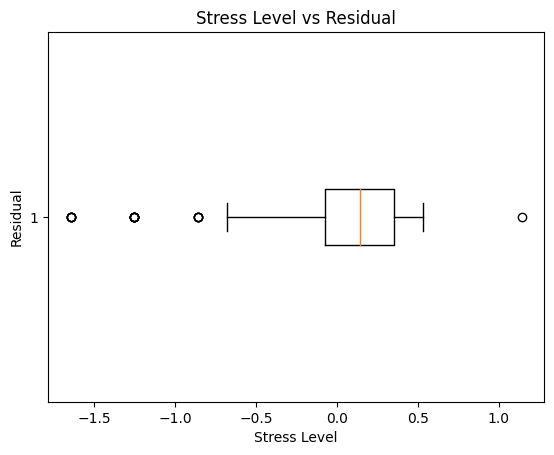

In [ ]:
## Residual Plot
from scipy.stats import norm
y_hat = -0.6070*df['StressLevel'] + 10.5008
# reg = model.fit()
yhat1 = reg.predict()
# yhat = reg.fittedvalues
residual = df['QualityofSleep'] - yhat1

data = {'residual':residual}
df1 = pd.DataFrame(data)
print(df1)

# plt.scatter(df['StressLevel'], residual)
plt.xlabel("Stress Level")
plt.ylabel("Residual")
plt.title("Stress Level vs Residual")
plt.boxplot(df1.residual, vert = False)
plt.show()

,residual,z-Score
0,-1.644541,-2.638822
1,-1.644541,-2.296792
2,-1.644541,-2.109033
3,-1.644541,-1.975134
4,-1.644541,-1.869422
...,...,...
145,0.534378,1.869422
146,0.534378,1.975134
147,0.534378,2.109033
148,0.534378,2.296792


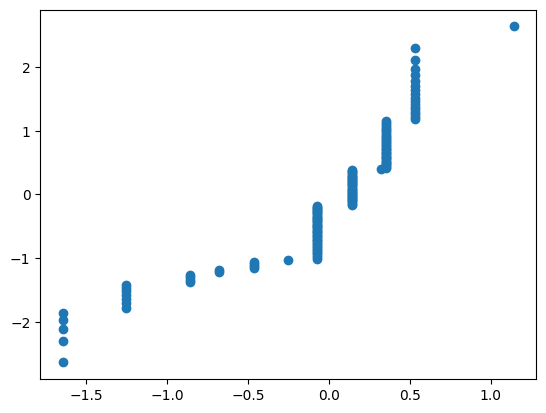

In [ ]:
## Normal Probability Plot
no = list(range(1, len(df1['residual']) + 1, 1))
f_i = []
z = []
for i in range(0, len(no)):
    f_i.append((no[i] - 0.375)/(len(no) + 0.25))
    z.append(norm.ppf(f_i[i], 0, 1))

a = []
for i in range(0, len(no)):
    a.append(residual[i])
a.sort()

data1 = {'residual': a,
       'z-Score': z}
df = pd.DataFrame(data1)
display(df)
plt.scatter(df['residual'], df['z-Score'])
plt.show()

# **3. Check normality for 2 quantitative variables**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Load the data
df = pd.read_excel("Data_SM.xlsx")

# Rename the columns
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep': 'QualityofSleep'}, inplace=True)


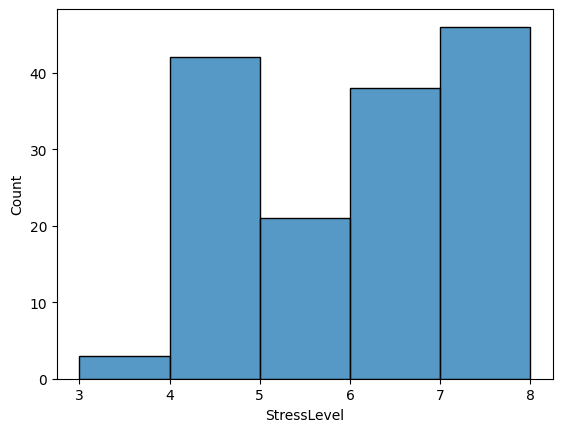

In [ ]:
ax = sns.histplot(x=df['StressLevel'], bins=np.arange(3, 9, 1))
plt.show()

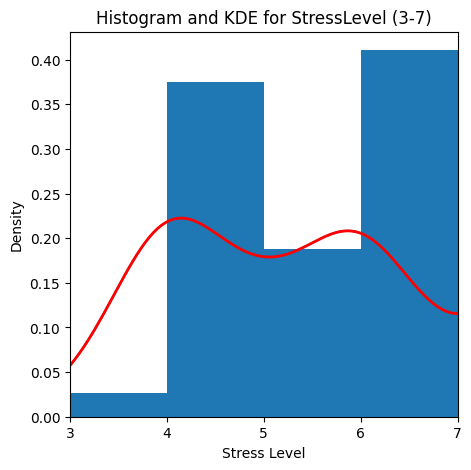

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the data
df = pd.read_excel("Data_SM.xlsx")

# Rename the columns
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep': 'QualityofSleep'}, inplace=True)

# Filter data to only include StressLevel values between 3 and 9
df_filtered = df[(df['StressLevel'] >= 3) & (df['StressLevel'] < 9)]

# Plot the distribution of StressLevel with KDE
plt.figure(figsize=(5, 5))
sns.histplot(df_filtered['StressLevel'], kde=True, stat="density", linewidth=0, bins=np.arange(3, 8, 1), alpha=1)


# Plot the KDE line with a different color
sns.kdeplot(df_filtered['StressLevel'], color='red', linewidth=2) # Màu của đường KDE

# Customize the range and plot limits
plt.xlim(3, 7)
plt.xticks(np.arange(3, 8, 1))
plt.title('Histogram and KDE for StressLevel (3-7)')
plt.xlabel('Stress Level')
plt.ylabel('Density')

# Show the plot
plt.show()


# **4. Construct Confidence Interval**

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# Read data
df = pd.read_excel("Data_SM.xlsx")
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep':'QualityofSleep'}, inplace=True)


def confidence_interval(data, confidence=0.95):
    # Convert data to a numpy array
    data = np.array(data)

    # Calculate sample mean and standard error
    mean = np.mean(data)
    std_err = stats.sem(data)

    # Get the critical value (Z or t) based on the sample size
    n = len(data)
    if n > 30:
        critical_value = stats.norm.ppf((1 + confidence) / 2)
    else:
        critical_value = stats.t.ppf((1 + confidence) / 2, df=n-1)

    # Calculate the margin of error
    margin_of_error = critical_value * std_err

    # Construct the confidence interval
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return (lower_bound, upper_bound)

In [ ]:
data = df['StressLevel']

# Calculate the 95% confidence interval
confidence_lvl = 0.95
ci = confidence_interval(data, confidence_lvl)

print(f"The {int(confidence_lvl*100)}% confidence interval is: {ci}")

The 95% confidence interval is: (5.547820261920501, 6.052179738079499)


In [ ]:
data = df['StressLevel']

# Calculate the 90% confidence interval
confidence_lvl = 0.90
ci = confidence_interval(data, confidence_lvl)

print(f"The {int(confidence_lvl*100)}% confidence interval is: {ci}")

The 90% confidence interval is: (5.588364092352912, 6.011635907647087)


In [ ]:
data = df['StressLevel']

# Calculate the 99% confidence interval
confidence_lvl = 0.99
ci = confidence_interval(data, confidence_lvl)

print(f"The {int(confidence_lvl*100)}% confidence interval is: {ci}")

The 99% confidence interval is: (5.468579645222973, 6.131420354777027)


# **Perform Hypothesis Testing**

**POPULATION MEAN**

In [ ]:
# Hypothesis test for Stress Level (H0: mean = hypothesized value)
hypothesized_mean_stress = 5.1  # for example
t_statistic_stress, p_value_stress = stats.ttest_1samp(df['StressLevel'], hypothesized_mean_stress)

print(f'Test Statistics for Stress Level: {t_statistic_stress}')
print(f'P-value for Stress Level: {p_value_stress}')

Test Statistics for Stress Level: 5.440464010417555
P-value for Stress Level: 2.132692953604107e-07


# Test other Linear Regression

In [ ]:
df = pd.read_excel("Data_SM.xlsx")
df.rename(columns={'Stress Level': 'StressLevel', 'Quality of Sleep':'QualityofSleep'}, inplace=True)

df = df[['StressLevel', 'QualityofSleep', 'Gender']]
df

,StressLevel,QualityofSleep,Gender
0,6,6,Male
1,8,6,Male
2,8,6,Male
3,8,4,Male
4,8,4,Male
...,...,...,...
145,5,7,Female
146,5,8,Male
147,7,5,Male
148,6,7,Female


x = logx

y = y

,logx,y
0,1.791759,6
1,2.079442,6
2,2.079442,6
3,2.079442,4
4,2.079442,4
...,...,...
145,1.609438,7
146,1.609438,8
147,1.945910,5
148,1.791759,7


Correlation logx and y 
 [[ 1.         -0.86588329]
 [-0.86588329  1.        ]]


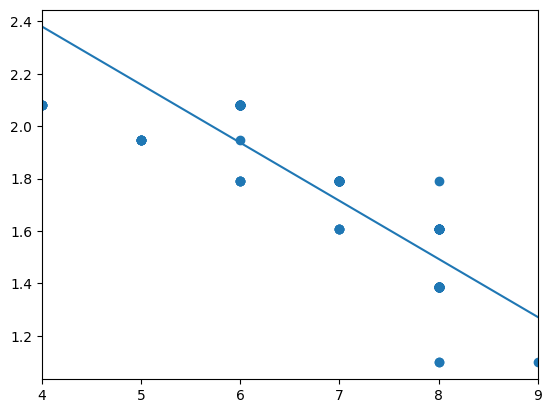

                            OLS Regression Results                            
Dep. Variable:                   logx   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     443.4
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.27e-46
Time:                        06:56:23   Log-Likelihood:                 82.993
No. Observations:                 150   AIC:                            -162.0
Df Residuals:                     148   BIC:                            -156.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2678      0.074     43.927      0.0

In [ ]:
logx = np.log(df['StressLevel'])
# logy = np.log(df['y'])
y = df['QualityofSleep']
data = {'logx': logx,
       'y': y}
df1 = pd.DataFrame(data)
display(df1)

print('Correlation logx and y \n', np.corrcoef(df1['logx'], df1['y']))

X = sm.add_constant(y)
y = logx
model = sm.OLS(y, X).fit()

fig = sm.graphics.abline_plot(model_results = model)
ax = fig.axes[0]
ax.scatter(X.iloc[:,1], y)
#ax.margins(0.1)
plt.show()

y, X = dmatrices('logx ~ y', data=df1, return_type='dataframe')

model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())

x = x

y = logy

,logy,x
0,1.791759,6
1,1.791759,8
2,1.791759,8
3,1.386294,8
4,1.386294,8
...,...,...
145,1.945910,5
146,2.079442,5
147,1.609438,7
148,1.945910,6


Correlation logx and y 
 [[ 1.         -0.83919139]
 [-0.83919139  1.        ]]


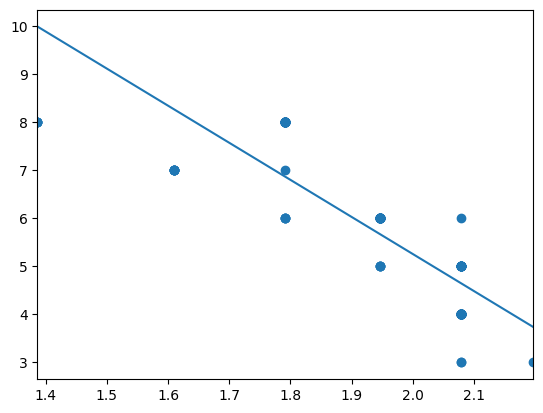

                            OLS Regression Results                            
Dep. Variable:                   logy   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     352.4
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.50e-41
Time:                        06:56:38   Log-Likelihood:                 143.39
No. Observations:                 150   AIC:                            -282.8
Df Residuals:                     148   BIC:                            -276.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4595      0.029     84.069      0.0

In [ ]:
# logx = np.log(df['x'])
logy = np.log(df['QualityofSleep'])
x = df['StressLevel']
data = {'logy': logy,
       'x': x}
df1 = pd.DataFrame(data)
display(df1)

print('Correlation logx and y \n', np.corrcoef(df1['logy'], df1['x']))

X = sm.add_constant(logy)
y = x
model = sm.OLS(y, X).fit()

fig = sm.graphics.abline_plot(model_results = model)
ax = fig.axes[0]
ax.scatter(X.iloc[:,1], y)
#ax.margins(0.1)
plt.show()

y, X = dmatrices('logy ~ x', data=df1, return_type='dataframe')

model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())

x = logx

y = logy

,logx,logy
0,0.778151,0.778151
1,0.903090,0.778151
2,0.903090,0.778151
3,0.903090,0.602060
4,0.903090,0.602060
...,...,...
145,0.698970,0.845098
146,0.698970,0.903090
147,0.845098,0.698970
148,0.778151,0.845098


Correlation logx and logy 
 [[ 1.         -0.82395481]
 [-0.82395481  1.        ]]


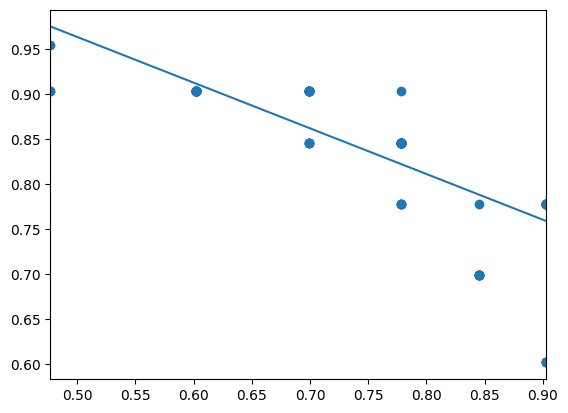

                            OLS Regression Results                            
Dep. Variable:                   logy   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     312.9
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.45e-38
Time:                        06:56:47   Log-Likelihood:                 262.33
No. Observations:                 150   AIC:                            -520.7
Df Residuals:                     148   BIC:                            -514.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2164      0.022     56.123      0.0

In [ ]:
logx = np.log10(df['StressLevel'])
logy = np.log10(df['QualityofSleep'])
data = {'logx': logx,
       'logy': logy}
df1 = pd.DataFrame(data)
display(df1)

print('Correlation logx and logy \n', np.corrcoef(df1['logx'], df1['logy']))

X = sm.add_constant(logx)
y = logy
model = sm.OLS(y, X).fit()

fig = sm.graphics.abline_plot(model_results = model)
ax = fig.axes[0]
ax.scatter(X.iloc[:,1], y)
#ax.margins(0.1)
plt.show()

y, X = dmatrices('logy ~ logx', data=df1, return_type='dataframe')

model = sm.OLS(y, X)
reg = model.fit()
print(reg.summary())



# **THE END**